# Kaggle: Recruit Restaurant

## 获取数据 

### air_visit_data

In [2]:
import pandas as pd
air_visit = pd.read_csv(r'C:/ML/project/Recruit/air_visit_data.csv')
air_visit.index = pd.to_datetime(air_visit['visit_date'])
air_visit = air_visit.groupby('air_store_id').apply(lambda g: g['visitors'].resample('1d').sum()).reset_index()
air_visit['visit_date'] = air_visit['visit_date'].dt.strftime('%Y-%m-%d')
air_visit['is_null'] = air_visit['visitors'].isnull()
air_visit['visitors'].fillna(0, inplace=True)

air_visit.head()

,air_store_id,visit_date,visitors,is_null
0,air_00a91d42b08b08d9,2016-07-01,35.0,False
1,air_00a91d42b08b08d9,2016-07-02,9.0,False
2,air_00a91d42b08b08d9,2016-07-03,0.0,True
3,air_00a91d42b08b08d9,2016-07-04,20.0,False
4,air_00a91d42b08b08d9,2016-07-05,25.0,False


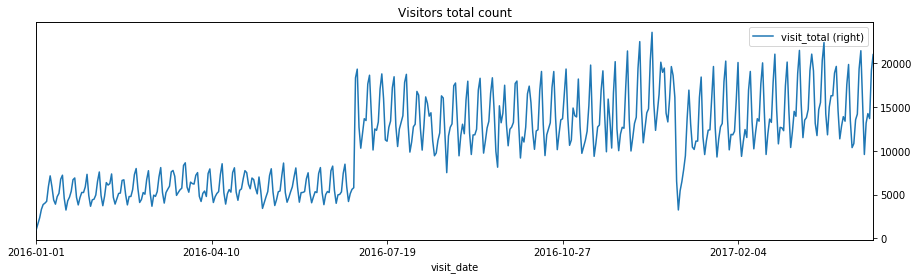

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

air=pd.DataFrame()
air['visit_total'] = air_visit.groupby(air_visit['visit_date'],squeeze=True,sort=True)['visitors'].sum()
air['visit_total'].plot(legend=True, figsize=(15,4), secondary_y=True,
                      title='Visitors total count');


### data_info

In [4]:
date_info = pd.read_csv(r'C:/ML/project/Recruit/date_info.csv')
date_info.rename(columns={'holiday_flg': 'is_holiday', 'calendar_date': 'visit_date'}, inplace=True)
date_info['prev_day_is_holiday'] = date_info['is_holiday'].shift().fillna(0)
date_info['next_day_is_holiday'] = date_info['is_holiday'].shift(-1).fillna(0)

date_info.head()

,visit_date,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday
0,2016-01-01,Friday,1,0.0,1.0
1,2016-01-02,Saturday,1,1.0,1.0
2,2016-01-03,Sunday,1,1.0,0.0
3,2016-01-04,Monday,0,1.0,0.0
4,2016-01-05,Tuesday,0,0.0,0.0


### air_store_info

In [5]:
air_store_info = pd.read_csv(r'C:/ML/project/Recruit/weather/air_store_info_with_nearest_active_station.csv')

air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,latitude_str,longitude_str,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,"""34.6951242""","""135.1978525""",hyogo__kobe-kana__koube,34.696667,135.211667,1.277232,1.274882
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,"""34.6951242""","""135.1978525""",hyogo__kobe-kana__koube,34.696667,135.211667,1.277232,1.274882
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,"""34.6951242""","""135.1978525""",hyogo__kobe-kana__koube,34.696667,135.211667,1.277232,1.274882
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,"""34.6951242""","""135.1978525""",hyogo__kobe-kana__koube,34.696667,135.211667,1.277232,1.274882
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,"""35.6580681""","""139.7515992""",tokyo__tokyo-kana__tonokyo,35.691667,139.750000,3.730672,3.739835


### sample_submission

In [6]:
import numpy as np

submission = pd.read_csv(r'C:/ML/project/Recruit/sample_submission.csv')
submission['air_store_id'] = submission['id'].str.slice(0, 20)
submission['visit_date'] = submission['id'].str.slice(21)
submission['is_test'] = True
submission['visitors'] = np.nan
submission['test_number'] = range(len(submission))

submission.head()

,id,visitors,air_store_id,visit_date,is_test,test_number
0,air_00a91d42b08b08d9_2017-04-23,NaN,air_00a91d42b08b08d9,2017-04-23,True,0
1,air_00a91d42b08b08d9_2017-04-24,NaN,air_00a91d42b08b08d9,2017-04-24,True,1
2,air_00a91d42b08b08d9_2017-04-25,NaN,air_00a91d42b08b08d9,2017-04-25,True,2
3,air_00a91d42b08b08d9_2017-04-26,NaN,air_00a91d42b08b08d9,2017-04-26,True,3
4,air_00a91d42b08b08d9_2017-04-27,NaN,air_00a91d42b08b08d9,2017-04-27,True,4


为了方便之后数据的提取与预处理，将训练集与测试集先进行合并

### 合并训练集与测试集

In [7]:
data = pd.concat((air_visit, submission.drop('id', axis='columns')))
data['is_test'].fillna(False, inplace=True)
data = pd.merge(left=data, right=date_info, on='visit_date', how='left')
data = pd.merge(left=data, right=air_store_info, on='air_store_id', how='left')
data['visitors'] = data['visitors'].astype(float)

data.head()

,air_store_id,is_null,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,...,air_area_name,latitude,longitude,latitude_str,longitude_str,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle
0,air_00a91d42b08b08d9,False,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
1,air_00a91d42b08b08d9,False,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
2,air_00a91d42b08b08d9,True,False,NaN,2016-07-03,0.0,Sunday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
3,air_00a91d42b08b08d9,False,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
4,air_00a91d42b08b08d9,False,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906


### weather

In [8]:
import glob

weather_dfs = []

for path in glob.glob(r'C:/ML/project/Recruit/weather/1-1-16_5-31-17_Weather/1-1-16_5-31-17_Weather/*.csv'):
    weather_df = pd.read_csv(path)
    weather_df['station_id'] = path.split('\\')[-1].rstrip('.csv')
    weather_dfs.append(weather_df)

weather = pd.concat(weather_dfs, axis='rows')
weather.rename(columns={'calendar_date': 'visit_date'}, inplace=True)

weather.head()

,visit_date,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover,station_id
0,2016-01-01,6.0,11.0,0.7,0.0,9.1,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
1,2016-01-02,4.7,10.5,0.0,0.0,6.8,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
2,2016-01-03,7.0,13.8,1.9,0.0,8.6,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
3,2016-01-04,8.8,14.7,2.7,0.0,5.3,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
4,2016-01-05,8.9,14.1,3.4,0.0,4.5,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai


### weather >>>  Human_comfort_index

In [9]:
means = weather.groupby('visit_date')[['avg_temperature', 'precipitation','avg_wind_speed']].mean().reset_index()
means.rename(columns={'avg_temperature': 'global_avg_temperature', 'precipitation': 'global_precipitation','avg_wind_speed':'global_avg_wind_speed'}, inplace=True)
weather = pd.merge(left=weather, right=means, on='visit_date', how='left')

weather['avg_temperature'].fillna(weather['global_avg_temperature'], inplace=True)
weather['precipitation'].fillna(weather['global_precipitation'], inplace=True)
weather['avg_wind_speed'].fillna(weather['avg_wind_speed'], inplace=True)

weather['Human_comfort_index']=(1.818*weather['avg_temperature']+ 18.18)*(0.88 + 0.002*weather['precipitation'])+\
(weather['avg_temperature']- 32.0) / (45.0 -weather['avg_temperature'])- 3.2*weather['avg_wind_speed']+ 18.2

weather[['visit_date', 'avg_temperature', 'precipitation','Human_comfort_index']].head()

,visit_date,avg_temperature,precipitation,Human_comfort_index
0,2016-01-01,6.0,0.0,33.850773
1,2016-01-02,4.7,0.0,36.560229
2,2016-01-03,7.0,0.0,40.259385
3,2016-01-04,8.8,0.0,40.596108
4,2016-01-05,8.9,0.0,39.157087


### Preliminary data

In [10]:
data['visit_date'] = pd.to_datetime(data['visit_date'])
data.index = data['visit_date']
data.sort_values(['air_store_id', 'visit_date'], inplace=True)

data.head()

,air_store_id,is_null,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,...,air_area_name,latitude,longitude,latitude_str,longitude_str,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
2016-07-02,air_00a91d42b08b08d9,False,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
2016-07-03,air_00a91d42b08b08d9,True,False,NaN,2016-07-03,0.0,Sunday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
2016-07-04,air_00a91d42b08b08d9,False,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906
2016-07-05,air_00a91d42b08b08d9,False,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906


## 数据预处理

### Find outliers

In [11]:
def find_outliers(series):
    return (series - series.mean()) > 1.96 * series.std()


def cap_values(series):
    outliers = find_outliers(series)
    max_val = series[~outliers].max()
    series[outliers] = max_val
    return series


stores = data.groupby('air_store_id')
data['is_outlier'] = stores.apply(lambda g: find_outliers(g['visitors'])).values
data['visitors_capped'] = stores.apply(lambda g: cap_values(g['visitors'])).values
data['visitors_capped_log1p'] = np.log1p(data['visitors_capped'])
data.head()


,air_store_id,is_null,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,...,latitude_str,longitude_str,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle,is_outlier,visitors_capped,visitors_capped_log1p
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,...,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906,False,35.0,3.583519
2016-07-02,air_00a91d42b08b08d9,False,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,...,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906,False,9.0,2.302585
2016-07-03,air_00a91d42b08b08d9,True,False,NaN,2016-07-03,0.0,Sunday,0,0.0,0.0,...,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906,False,0.0,0.000000
2016-07-04,air_00a91d42b08b08d9,False,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,...,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906,False,20.0,3.044522
2016-07-05,air_00a91d42b08b08d9,False,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,...,"""35.6940027""","""139.7535951""",tokyo__tokyo-kana__tonokyo,35.691667,139.75,0.416011,0.415906,False,25.0,3.258097


## 特征工程

### 各个餐厅在日本的分布情况

#### 将餐厅在地理位置上进行聚类

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0).fit(data[['longitude','latitude']])
data['cluster'] = kmeans.predict(data[['longitude','latitude']])

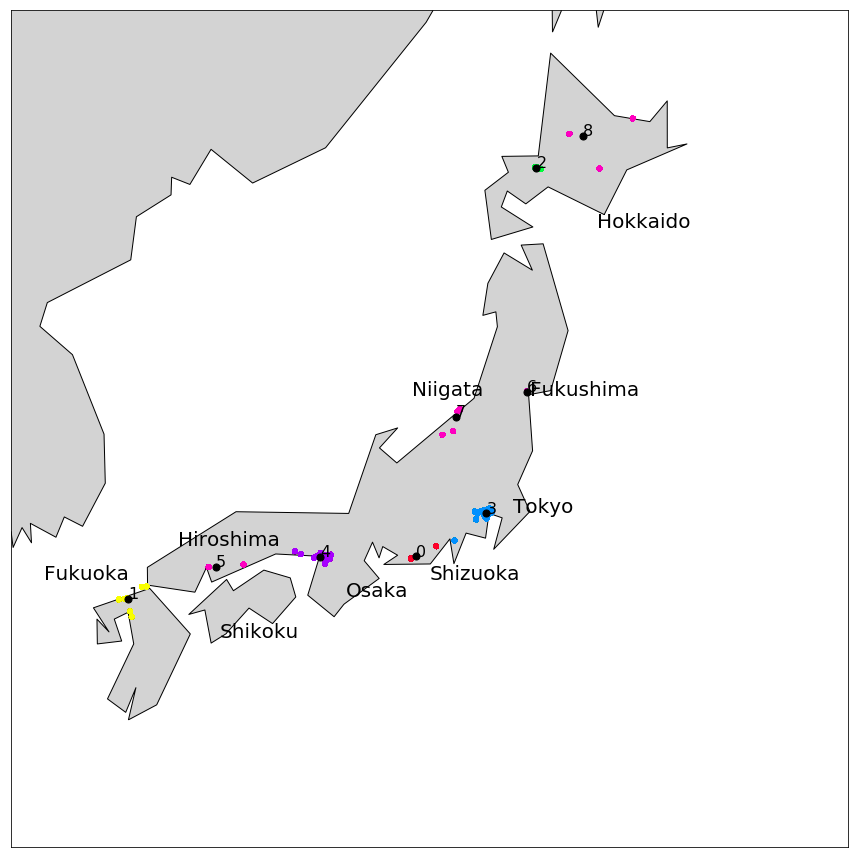

In [13]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='aeqd',width=2000000,height=2000000, lat_0=37.5, lon_0=138.2)

cx = [c[0] for c in kmeans.cluster_centers_]
cy = [c[1] for c in kmeans.cluster_centers_]
cm = plt.get_cmap('gist_rainbow')
colors = [cm(2.*i/9) for i in range(9)]
colored = [colors[k] for k in data['cluster']]
f,axa = plt.subplots(1,1,figsize=(15,16))
m.drawcoastlines()
m.fillcontinents(color='lightgray',lake_color='aqua',zorder=1)
m.scatter(data.longitude.values,data.latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
m.scatter(cx,cy,color='Black',s=50,alpha=1,latlon=True,zorder=9999)
plt.setp(axa.get_yticklabels(), visible=True)
plt.annotate('Fukuoka', xy=(0.04, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Shikoku', xy=(0.25, 0.25), xycoords='axes fraction',fontsize=20)
plt.annotate('Hiroshima', xy=(0.2, 0.36), xycoords='axes fraction',fontsize=20)
plt.annotate('Osaka', xy=(0.40, 0.30), xycoords='axes fraction',fontsize=20)

plt.annotate('Tokyo', xy=(0.60, 0.4), xycoords='axes fraction',fontsize=20)
plt.annotate('Shizuoka', xy=(0.50, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Niigata', xy=(0.48, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Fukushima', xy=(0.62, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Hokkaido', xy=(0.7, 0.74), xycoords='axes fraction',fontsize=20)

for i in range(len(cx)):
    xpt,ypt = m(cx[i],cy[i])
    plt.annotate(i, (xpt+500,ypt+500),zorder=99999,fontsize=16)
plt.show()

#### 各区域餐厅数的分布的影响

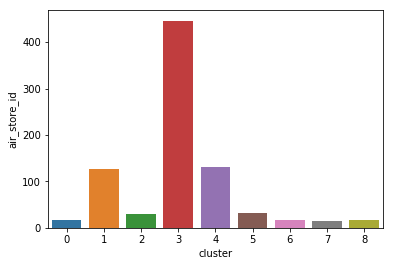

In [14]:
import seaborn as sns

air_info=pd.read_csv(r'C:/ML/project/Recruit/air_store_info.csv')
stores=pd.merge(data,air_info,on='air_store_id',how='right')
stores.drop_duplicates('air_store_id',inplace=True)
hist_clust = stores.groupby(['cluster'],as_index=False).count()
sns.barplot(x=hist_clust.cluster,y=hist_clust.air_store_id)

plt.show()

#### 各区域餐厅种类的影响

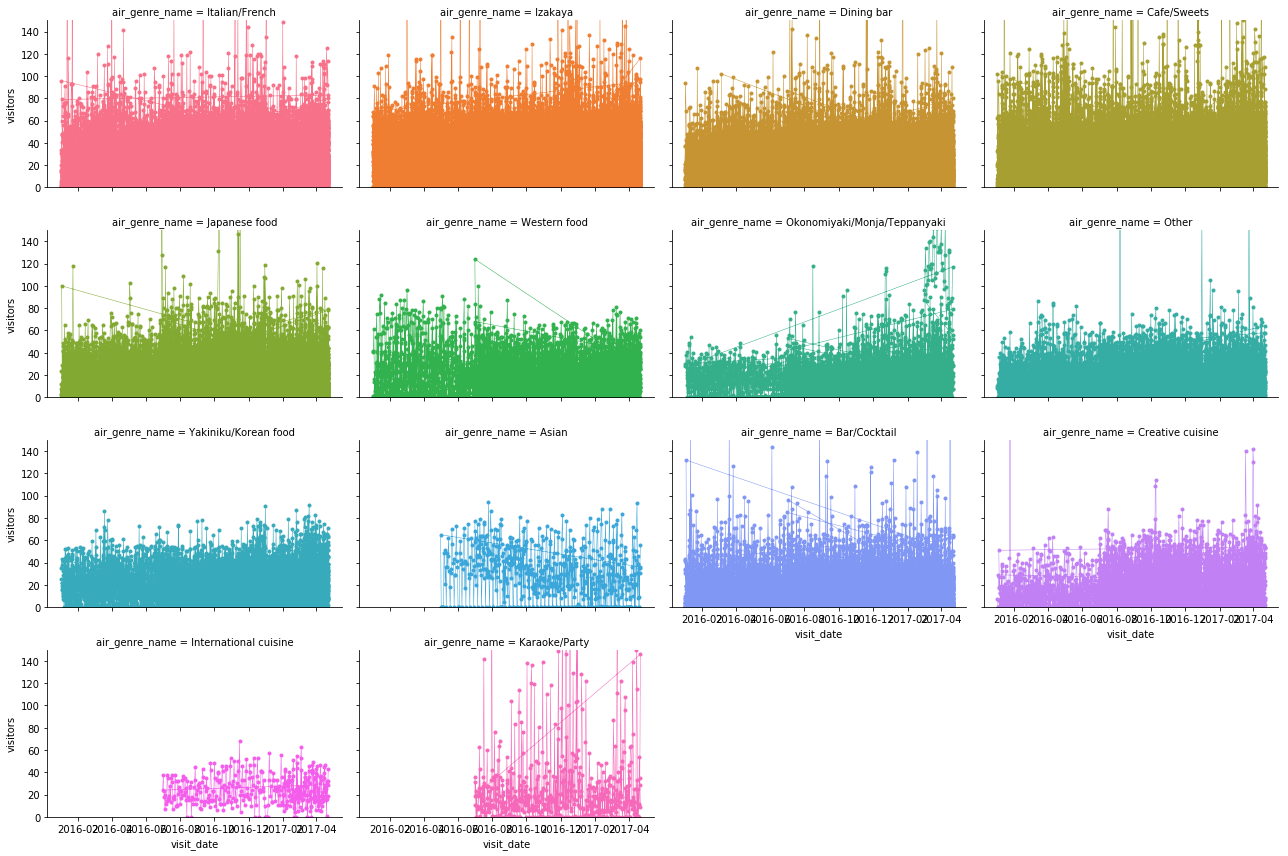

In [15]:
ax = sns.FacetGrid(data, col="air_genre_name", col_wrap=4, size=3, hue='air_genre_name',margin_titles=True,
                  aspect=1.5, palette='husl', ylim=(0,150))
ax = ax.map(plt.plot, "visit_date", "visitors",  marker=".", linewidth = 0.5)

#### 时间特征
  对于这个问题，我们既可以把它当成是一个回归问题来处理，也可以将它当成是一个时间序列问题来处理。指数加权移动平均就是一种用来处理时间问题的有效方法。在t时刻，根据实际的观测值可以求取EWMA(t)：EWMA(t) = a*Y(t) + (1-a)*EWMA(t-1)，t = 1,2,.....,n；其中，EWMA(t)  t时刻的估计值；Y(t) t时刻的测量值；n 所观察的总的时间；a表示对于历史测量值权重系数。之所以称之为指数加权，是因为加权系数a是以指数式递减的，即各指数随着时间而指数式递减。用n表示为a = 2/(n+1)。
  系数a越接近1表示对当前抽样值的权重越高，对过去测量值得权重越低，估计值(器)的时效性就越强，反之，越弱；另外，EWMA还有一定的吸收瞬间突发的能力，也即平稳性，显然随着a减小，参考过去测量值的程度更多一些，平稳性增强，反之则降低。

In [16]:
from scipy import optimize

data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
data['day_of_month'] = data['visit_date'].dt.day

def calc_shifted_ewm(series, alpha, adjust=True):
    return series.shift().ewm(alpha=alpha, adjust=adjust).mean()


def find_best_signal(series, adjust=False, eps=10e-5):
    
    def f(alpha):
        shifted_ewm = calc_shifted_ewm(series=series, alpha=min(max(alpha, 0), 1), adjust=adjust)
        corr = np.mean(np.power(series - shifted_ewm, 2))
        return corr
     
    res = optimize.differential_evolution(func=f, bounds=[(0 + eps, 1 - eps)])
    
    return calc_shifted_ewm(series=series, alpha=res['x'][0], adjust=adjust)


roll = data.groupby(['air_store_id', 'day_of_week']).apply(lambda g: find_best_signal(g['visitors_capped']))
data['optimized_ewm_by_air_store_id_&_day_of_week'] = roll.sort_index(level=['air_store_id', 'visit_date']).values

roll = data.groupby(['air_store_id', 'is_weekend']).apply(lambda g: find_best_signal(g['visitors_capped']))
data['optimized_ewm_by_air_store_id_&_is_weekend'] = roll.sort_index(level=['air_store_id', 'visit_date']).values

roll = data.groupby(['air_store_id', 'day_of_week']).apply(lambda g: find_best_signal(g['visitors_capped_log1p']))
data['optimized_ewm_log1p_by_air_store_id_&_day_of_week'] = roll.sort_index(level=['air_store_id', 'visit_date']).values

roll = data.groupby(['air_store_id', 'is_weekend']).apply(lambda g: find_best_signal(g['visitors_capped_log1p']))
data['optimized_ewm_log1p_by_air_store_id_&_is_weekend'] = roll.sort_index(level=['air_store_id', 'visit_date']).values

data.head()

,air_store_id,is_null,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,...,is_outlier,visitors_capped,visitors_capped_log1p,cluster,is_weekend,day_of_month,optimized_ewm_by_air_store_id_&_day_of_week,optimized_ewm_by_air_store_id_&_is_weekend,optimized_ewm_log1p_by_air_store_id_&_day_of_week,optimized_ewm_log1p_by_air_store_id_&_is_weekend
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,...,False,35.0,3.583519,3,0,1,NaN,NaN,NaN,NaN
2016-07-02,air_00a91d42b08b08d9,False,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,...,False,9.0,2.302585,3,1,2,NaN,NaN,NaN,NaN
2016-07-03,air_00a91d42b08b08d9,True,False,NaN,2016-07-03,0.0,Sunday,0,0.0,0.0,...,False,0.0,0.000000,3,1,3,NaN,9.000000,NaN,2.302585
2016-07-04,air_00a91d42b08b08d9,False,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,...,False,20.0,3.044522,3,0,4,NaN,35.000000,NaN,3.583519
2016-07-05,air_00a91d42b08b08d9,False,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,...,False,25.0,3.258097,3,0,5,NaN,33.429622,NaN,3.428513


In [17]:
def extract_precedent_statistics(df, on, group_by):
    
    df.sort_values(group_by + ['visit_date'], inplace=True)
    
    groups = df.groupby(group_by, sort=False)
    
    stats = {
        'mean': [],
        'median': [],
        'std': [],
        'count': [],
        'max': [],
        'min': []
    }
    
    exp_alphas = [0.1, 0.25, 0.3, 0.5, 0.75]
    stats.update({'exp_{}_mean'.format(alpha): [] for alpha in exp_alphas})
    
    for _, group in groups:
        
        shift = group[on].shift()
        roll = shift.rolling(window=len(group), min_periods=1)
        
        stats['mean'].extend(roll.mean())
        stats['median'].extend(roll.median())
        stats['std'].extend(roll.std())
        stats['count'].extend(roll.count())
        stats['max'].extend(roll.max())
        stats['min'].extend(roll.min())
        
        for alpha in exp_alphas:
            exp = shift.ewm(alpha=alpha, adjust=False)
            stats['exp_{}_mean'.format(alpha)].extend(exp.mean())
    
    suffix = '_&_'.join(group_by)
    
    for stat_name, values in stats.items():
        df['{}_{}_by_{}'.format(on, stat_name, suffix)] = values


extract_precedent_statistics(
    df=data,
    on='visitors_capped',
    group_by=['air_store_id', 'day_of_week']
)

extract_precedent_statistics(
    df=data,
    on='visitors_capped',
    group_by=['air_store_id', 'is_weekend']
)

extract_precedent_statistics(
    df=data,
    on='visitors_capped',
    group_by=['air_store_id']
)

extract_precedent_statistics(
    df=data,
    on='visitors_capped_log1p',
    group_by=['air_store_id', 'day_of_week']
)

extract_precedent_statistics(
    df=data,
    on='visitors_capped_log1p',
    group_by=['air_store_id', 'is_weekend']
)

extract_precedent_statistics(
    df=data,
    on='visitors_capped_log1p',
    group_by=['air_store_id']
)

data.sort_values(['air_store_id', 'visit_date']).head()

,air_store_id,is_null,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,...,visitors_capped_log1p_median_by_air_store_id,visitors_capped_log1p_std_by_air_store_id,visitors_capped_log1p_count_by_air_store_id,visitors_capped_log1p_max_by_air_store_id,visitors_capped_log1p_min_by_air_store_id,visitors_capped_log1p_exp_0.1_mean_by_air_store_id,visitors_capped_log1p_exp_0.25_mean_by_air_store_id,visitors_capped_log1p_exp_0.3_mean_by_air_store_id,visitors_capped_log1p_exp_0.5_mean_by_air_store_id,visitors_capped_log1p_exp_0.75_mean_by_air_store_id
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,air_00a91d42b08b08d9,False,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,...,3.583519,NaN,1.0,3.583519,3.583519,3.583519,3.583519,3.583519,3.583519,3.583519
2016-07-03,air_00a91d42b08b08d9,True,False,NaN,2016-07-03,0.0,Sunday,0,0.0,0.0,...,2.943052,0.905757,2.0,3.583519,2.302585,3.455426,3.263285,3.199239,2.943052,2.622819
2016-07-04,air_00a91d42b08b08d9,False,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,...,2.302585,1.815870,3.0,3.583519,0.000000,3.109883,2.447464,2.239467,1.471526,0.655705
2016-07-05,air_00a91d42b08b08d9,False,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,...,2.673554,1.578354,4.0,3.583519,0.000000,3.103347,2.596729,2.480984,2.258024,2.447318


In [18]:
data = pd.get_dummies(data, columns=['day_of_week', 'air_genre_name'])

In [29]:
data['visitors_log1p'] = np.log1p(data['visitors'])
train = data[(data['is_test'] == False) & (data['is_outlier'] == False) & (data['is_null'] == False)]
test = data[data['is_test']].sort_values('test_number')

to_drop = ['air_store_id', 'is_test', 'test_number', 'visit_date', 'is_null',
           'is_outlier', 'visitors_capped', 'visitors', 'air_area_name',
           'station_id', 'station_latitude', 'station_longitude', 'station_vincenty',
           'station_great_circle', 'visitors_capped_log1p','latitude_str','longitude_str']
train1=train
test1=test
train = train.drop(to_drop, axis='columns')
train = train.dropna()
test = test.drop(to_drop, axis='columns')

X_train = train.drop('visitors_log1p', axis='columns')
X_test = test.drop('visitors_log1p', axis='columns')
y_train = train1['visitors_log1p']

In [30]:
import lightgbm as lgb
from sklearn import metrics
from sklearn import model_selection


def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5

X = X_train
y = y_train

print('Training LGB model...')
params = {}

params['application'] = 'regression'
params['boosting'] = 'gbdt'
#params['learning_rate'] = 0.02
params['learning_rate'] = 0.01
#params['num_leaves'] = 100
params['num_leaves'] = 40
#params['max_depth'] = 10
params['min_child_sample']=20
params['min_data_in_leaf']=100
#params['min_sum_hessian_in_leaf'] = 1e-2
params['sub_sample'] = 0.8
params['bagging_fraction'] = 0.85
params['feature_fraction'] = 0.95
#params['bagging_freq'] = 3
params['metric'] = 'mse'
params['seed'] = 520

K = 10
kf = model_selection.KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(1)

y_test_pred=0
cv_score=0
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index, :].copy(), X.iloc[test_index, :].copy()
    #X_test = test[col]
    d_train = lgb.Dataset(X_train, y_train)
    d_valid = lgb.Dataset(X_valid,y_valid)
    print("\nFold ", i)
    model=lgb.train(params,d_train,num_boost_round=2000,valid_sets=[d_train,d_valid],early_stopping_rounds=30,verbose_eval=20)
    
    print("\n".join(("%s: %.2f" % x) for x in sorted(
        zip(X_train.columns, model.feature_importance("gain")),
        key=lambda x: x[1], reverse=True
    )))
    
    pred = model.predict(X_valid)
    print('RMSLE GBM Regressor, validation set, fold ', i, ': ', RMSLE(y_valid, pred))
    cv_score+=RMSLE(y_valid, pred)
    
    pred = model.predict(X_test)
    print('Prediction length on test set, GBM Regressor, fold ', i, ': ', len(pred))
    y_test_pred += pred

    del X_test, X_train, X_valid, y_train

y_test_pred /= K  # Average test set predictions
print('cv_score:',cv_score/K)

# Create submission file
submission = pd.DataFrame()

submission['id'] = test1['air_store_id']

submission['visitors'] = np.expm1(y_test_pred)

submission.to_csv('gbm_submit.csv', float_format='%.6f', index=False)

print('We are done. That is all, folks!')

Training LGB model...

Fold  0
Train until valid scores didn't improve in 30 rounds.
[20]	training's l2: 2.39455	valid_1's l2: 2.39435
[40]	training's l2: 2.00582	valid_1's l2: 2.0054
[60]	training's l2: 1.69594	valid_1's l2: 1.69524
[80]	training's l2: 1.45166	valid_1's l2: 1.4508
[100]	training's l2: 1.26132	valid_1's l2: 1.26045
[120]	training's l2: 1.11481	valid_1's l2: 1.11399
[140]	training's l2: 1.00405	valid_1's l2: 1.00328
[160]	training's l2: 0.921877	valid_1's l2: 0.921161
[180]	training's l2: 0.861592	valid_1's l2: 0.861071
[200]	training's l2: 0.818154	valid_1's l2: 0.81782
[220]	training's l2: 0.786822	valid_1's l2: 0.786687
[240]	training's l2: 0.764135	valid_1's l2: 0.764211
[260]	training's l2: 0.747535	valid_1's l2: 0.74778
[280]	training's l2: 0.735446	valid_1's l2: 0.735852
[300]	training's l2: 0.726441	valid_1's l2: 0.726989
[320]	training's l2: 0.719616	valid_1's l2: 0.720279
[340]	training's l2: 0.714319	valid_1's l2: 0.715165
[360]	training's l2: 0.710054	valid_

KeyboardInterrupt: 